,class,count
0,Amphiprion_clarkii,4049
1,Chaetodon_lunulatus,2534
2,Chaetodon_trifascialis,190
3,Chromis_chrysura,3593
4,Dascyllus_reticulatus,12112
5,Plectroglyphidodon_dickii,2683


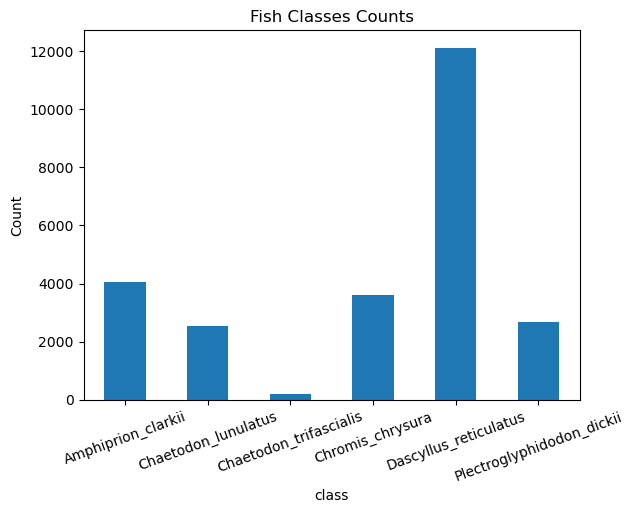

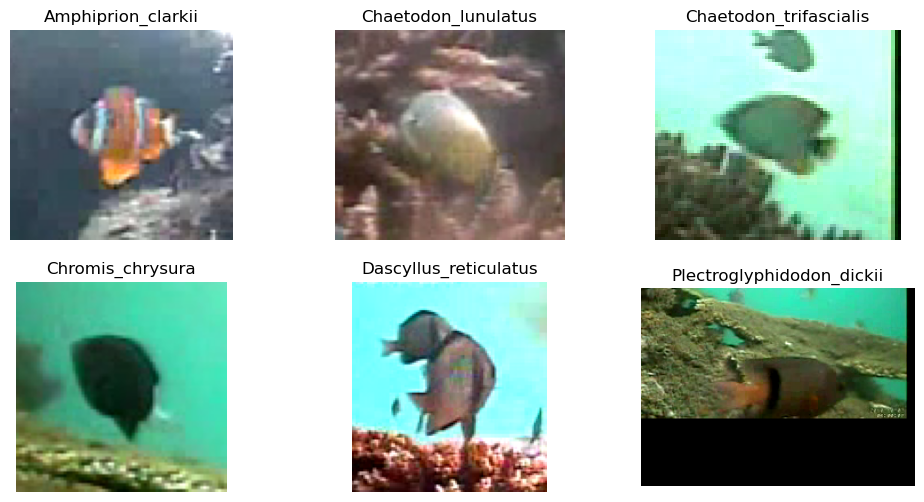

In [1]:
from bd_utils import * #utils.py homemade file
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#Show Data Distribution
p = r"./dataset"
classes = os.listdir(p)

df = pd.DataFrame(columns=["class","count"])

for i in range(0,len(classes)):
    df.loc[i] = [classes[i]] + [len(os.listdir(p+"/"+classes[i]))]
    
display(df)
ax = df.plot.bar(x='class', y='count', rot=20,title = "Fish Classes Counts", ylabel = "Count", legend = 0)

#Show one of each class
plt.figure(figsize=(12, 6))
for i in range(0,len(classes)):
    plt.subplot(2,len(classes)//2,i+1)
    image = mpimg.imread(p+ "/" + classes[i] + "/" + (os.listdir(p+"/"+classes[i])[0]))
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis('off')

In [2]:
imPath_df, dev_df = create_dataframes("fish_labels.txt") # get main dataset and development version (smaller)
#smaller dataset for testing
display(dev_df)

,imP,label
0,./dataset/Amphiprion_clarkii/fish_000000019599...,0
1,./dataset/Amphiprion_clarkii/fish_000000019599...,0
2,./dataset/Amphiprion_clarkii/fish_000000019599...,0
3,./dataset/Amphiprion_clarkii/fish_000000019599...,0
4,./dataset/Amphiprion_clarkii/fish_000000019599...,0
...,...,...
22573,./dataset/Plectroglyphidodon_dickii/fish_00001...,5
22574,./dataset/Plectroglyphidodon_dickii/fish_00001...,5
22575,./dataset/Plectroglyphidodon_dickii/fish_00001...,5
22576,./dataset/Plectroglyphidodon_dickii/fish_00001...,5


In [3]:
#Only Convolutions
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
from keras.layers import Dense, Conv2D, Flatten
from sklearn.utils.multiclass import type_of_target

from sklearn import tree


skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 123)

X=dev_df.imP
y=dev_df.label
y=y.astype('int') 


gt = [] #ground truth (appended on each fold)
results = [] # validation results (appended on each fold)


#stratified split
for train_index, test_index in tqdm(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
    y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values

    
    X_train_im = np.array(path2imflat(X_train))
    X_test_im = np.array(path2imflat(X_test))
    
    y_train = y_train
    y_test = y_test
    
    print("Image Loading Complete, training...")
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train_im, y_train)
    
    
    y_pred = clf.predict(X_test_im)
    
    #add to arrays for confusion matrix
    gt = np.append(gt , y_test)
    results = np.append(results , y_pred)
    print("Fold Complete")

0it [00:00, ?it/s]

Image Loading Complete, training...


1it [00:03,  3.43s/it]

Fold Complete
Image Loading Complete, training...


2it [00:06,  3.22s/it]

Fold Complete
Image Loading Complete, training...


3it [00:09,  3.19s/it]

Fold Complete
Image Loading Complete, training...


4it [00:12,  3.17s/it]

Fold Complete
Image Loading Complete, training...


5it [00:15,  3.11s/it]

Fold Complete
Image Loading Complete, training...


6it [00:18,  3.09s/it]

Fold Complete
Image Loading Complete, training...


7it [00:21,  3.09s/it]

Fold Complete
Image Loading Complete, training...


8it [00:24,  3.05s/it]

Fold Complete
Image Loading Complete, training...


9it [00:27,  3.05s/it]

Fold Complete
Image Loading Complete, training...


10it [00:31,  3.11s/it]

Fold Complete


In [4]:
#get per class confusion matrix and calculate metrics
get_metrics(gt,results)

Accuracy: 0.8583333333333333
Average Precision: 0.8583433533830451
Average Recall/Sensitivity: 0.8583333333333334
Average Specificity: 0.9716666666666666
Average F1 Score 0.8579476777583356
Average Cohen K 0.8296399672194298


<Figure size 2000x2000 with 0 Axes>

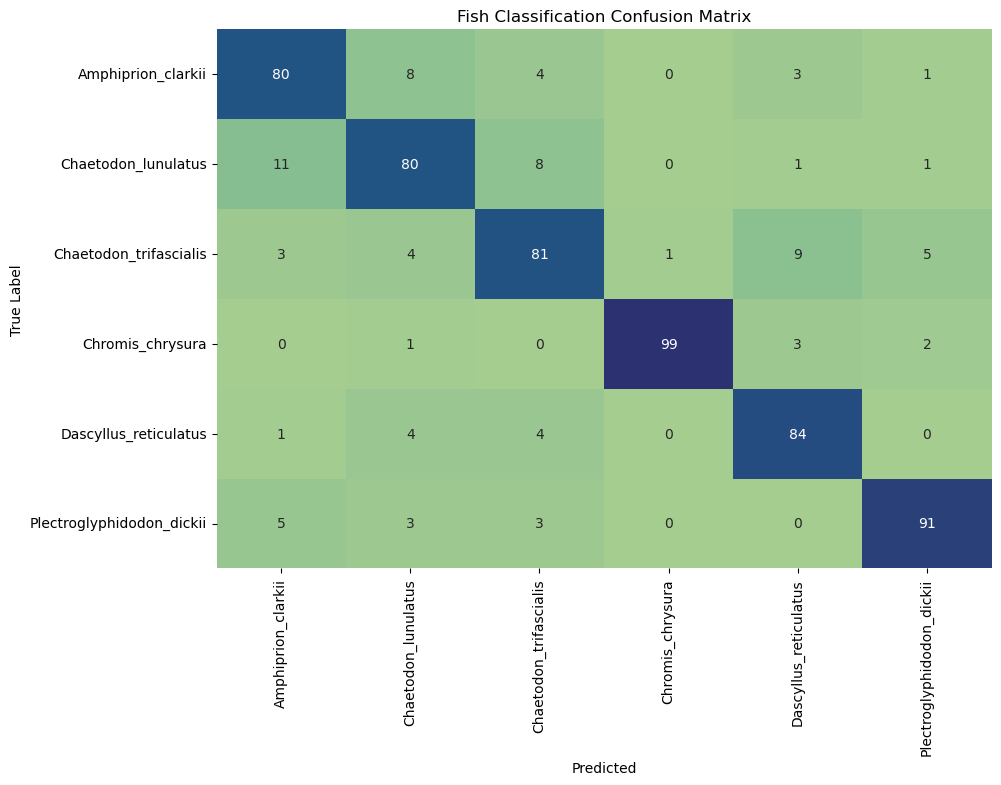

In [5]:
#Show confusion matrix
create_conf(df,gt,results)